# Example – estimating the quality of wines with regression trees

In [16]:
import math
import numpy as np
import pandas as pd
from datetime import datetime

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('seaborn-whitegrid')

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import statsmodels.api as sm

# Step 1 – collecting data

In [17]:
#To develop the wine rating model, we will use data donated to the UCI Machine Learning Data Repository 
#(http://archive.ics.uci.edu/ml) by P. Cortez, A. Cerdeira, F. Almeida, T. Matos, and J. Reis.
df = pd.read_csv('10 winequality-white.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


# Step 2 – exploring and preparing the data

In [18]:
#The wine data includes 11 features and the quality outcome, as follows
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


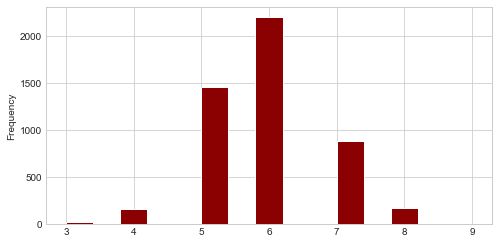

In [19]:
df['quality'].plot.hist(bins=15,color='darkred',edgecolor='white',figsize=(8,4))

# Step 3 – training a model on the data

In [20]:
x_train = df.drop('quality',axis = 1)
y_train = df['quality']
dtree = DecisionTreeRegressor()
dtree.fit(x_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

# Step 4 – evaluating model performance

In [21]:
y_pred = dtree.predict(x_train)
temp = pd.concat([pd.DataFrame(y_train),pd.DataFrame(y_pred)],axis=1)
temp.columns = ['actual','predicted']
temp.corr()

,actual,predicted
actual,1.0,1.0
predicted,1.0,1.0


In [22]:
print('MAE:', sm.tools.eval_measures.meanabs(y_train, y_pred, axis=0))
print('MSE:', sm.tools.eval_measures.mse(y_train, y_pred, axis=0))
print ('RMSE:', sm.tools.eval_measures.rmse(y_train, y_pred, axis=0))

MAE: 0.0
MSE: 0.0
RMSE: 0.0
